In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# error_bad_lines=False #加入参数
df_2018 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018.csv")
df_2019 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2019.csv")
df_2020 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020.csv")
df_2021 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021.csv")

# 将四个数据框合并为一个
frames = [df_2018, df_2019, df_2020, df_2021]
df = pd.concat(frames)

In [3]:
len(df)

8846265

In [49]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Capital/Adirond,Columbia,1001000.0,146.0,Columbia Memorial Hospital,50 to 69,125,F,White,Not Span/Hispanic,2,Elective,Short-term Hospital,2018,CIR020,CEREBRAL INFARCTION,NaN,NaN,45.0,CVA & PRECEREBRAL OCCLUSION W INFARCT,1.0,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,3.0,Major,Major,Medical,"Managed Care, Unspecified",Self-Pay,NaN,NaN,True,"17,591.41","3,570.06"
1,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,16,Emergency,Short-term Hospital,2018,RSP017,POSTPROCEDURAL OR POSTOPERATIVE RESPIRATORY SY...,ESA003,MECHANICAL VENTILATION,121.0,OTHER RESPIRATORY & CHEST PROCEDURES,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,4.0,Extreme,Extreme,Surgical,Medicare,Medicaid,NaN,NaN,True,"106,190.21","78,913.24"
2,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53"
3,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,18 to 29,112,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,CIR017,CARDIAC DYSRHYTHMIAS,IMG008,ULTRASONOGRAPHY,201.0,CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS,5.0,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,2.0,Moderate,Minor,Medical,Medicaid,Medicaid,NaN,NaN,True,"15,965.54","11,341.3"
4,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,0 to 17,104,M,Multi-racial,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,RSP002,PNEUMONIA (EXCEPT THAT CAUSED BY TUBERCULOSIS),NaN,NaN,139.0,OTHER PNEUMONIA,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3.0,Major,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,True,"36,846.83","10,240.02"


In [4]:
df_ = df[df['APR MDC Description'] != 
         'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD']

In [5]:
df_1 = df_[df_['APR MDC Description'] != 
         'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM']

In [6]:
len(df_1)

7079048

In [7]:
df_1['APR MDC Description'].value_counts()

DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM                                            1102440
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM                                             799045
DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE                   747865
DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM                                               681588
INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)                            626438
DISEASES AND DISORDERS OF THE NERVOUS SYSTEM                                                 583952
MENTAL DISEASES AND DISORDERS                                                                411599
DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT                                       381808
ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS                                  302834
ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS                           277258


In [44]:
df_ny = df_1[df_1['Hospital Service Area']=='New York City']

In [46]:
len(df_ny)

3106076

In [47]:
df_ny['Facility Name'].unique()

array(['Harlem Hospital Center', 'Kings County Hospital Center',
       'New York-Presbyterian Hospital - Columbia Presbyterian Center',
       'Maimonides Medical Center', 'Long Island Jewish Medical Center',
       'Montefiore Medical Center - Henry & Lucy Moses Div',
       'Memorial Hospital for Cancer and Allied Diseases',
       'University Hospital of Brooklyn', 'Queens Hospital Center',
       'Montefiore Medical Center-Wakefield Hospital',
       'Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div',
       "Cohen Children's Medical Center", 'Mount Sinai Beth Israel',
       'Richmond University Medical Center',
       'New York-Presbyterian Hospital - New York Weill Cornell Center',
       'BronxCare Hospital Center', 'Jamaica Hospital Medical Center',
       'Staten Island University Hosp-North',
       "Staten Island University Hospital Prince's Bay",
       'New York - Presbyterian/Queens', 'NYU Langone Hospitals',
       'Flushing Hospital Medical Center'

In [48]:
len(df_ny['Facility Name'].unique())

57

In [56]:
df_ny['Zip Code - 3 digits'].unique()

array(['100', '112', '104', '114', '113', '115', '103', '117', 'OOS',
       '118', '109', '105', '110', '125', '124', '119', '116', '111', nan,
       '101', '107', '108', '106', '146', '121', '132', '127', '129',
       '138', '126', '120', '133', '122', '137', '139', '123', '148',
       '147', '134', '140', '128', '136', '142', '130', '131', '135',
       '144', '149', '145', '143', '141'], dtype=object)

In [57]:
len(df_ny['Zip Code - 3 digits'].unique())

51

In [58]:
df_ny['Race'].unique()

array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)

In [59]:
df_ny['Hospital County'].unique()

array(['Manhattan', 'Kings', 'Queens', 'Bronx', 'Richmond'], dtype=object)

In [60]:
len(df_ny['Hospital County'].unique())

5

In [53]:
# 读取 Excel 文件，指定 sheet 名称或索引
df_zipcode = pd.read_excel('data dive.xlsx')

# 打印 dataframe
df_zipcode.head()

,Facility Name,zip code
0,Harlem Hospital Center,10037
1,Kings County Hospital Center,11203
2,Memorial Hospital for Cancer and Allied Diseases,10065
3,Queens Hospital Center,11432
4,Long Island Jewish Medical Center,11040


In [63]:
merged_df = pd.merge(df_ny, df_zipcode, left_on='Facility Name', right_on='Facility Name')
merged_df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,zip code
0,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,16,Emergency,Short-term Hospital,2018,RSP017,POSTPROCEDURAL OR POSTOPERATIVE RESPIRATORY SY...,ESA003,MECHANICAL VENTILATION,121.0,OTHER RESPIRATORY & CHEST PROCEDURES,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,4.0,Extreme,Extreme,Surgical,Medicare,Medicaid,NaN,NaN,True,"106,190.21","78,913.24",10037
1,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53",10037
2,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,CIR012,NONSPECIFIC CHEST PAIN,NaN,NaN,203.0,CHEST PAIN,5.0,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,1.0,Minor,Minor,Medical,Medicare,Medicaid,NaN,NaN,True,"12,290.21","9,133.24",10037
3,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,18 to 29,100,F,Black/African American,Not Span/Hispanic,1,Emergency,Home or Self Care,2018,GEN006,OTHER SPECIFIED AND UNSPECIFIED DISEASES OF KI...,URN003,URETER AND OTHER URINARY TRACT DILATION,465.0,URINARY STONES & ACQUIRED UPPER URINARY TRACT ...,11.0,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,True,"6,440.21","4,785.92",10037
4,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,70 or Older,100,M,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,CIR019,HEART FAILURE,NaN,NaN,194.0,HEART FAILURE,5.0,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,3.0,Major,Major,Medical,Medicare,Medicare,NaN,NaN,True,"21,290.21","15,821.42",10037


In [64]:
len(merged_df)

3106076

In [66]:
list_mental_issue = ['DISEASES AND DISORDERS OF THE NERVOUS SYSTEM', 'MENTAL DISEASES AND DISORDERS', 'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS']

In [67]:
df_mental = merged_df[merged_df['APR MDC Description'].isin(list_mental_issue)]

In [68]:
len(df_mental)

561877

In [69]:
df_mental.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,zip code
1,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53",10037
7,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,30 to 49,112,M,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53",10037
11,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,112,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,MBD017,ALCOHOL-RELATED DISORDERS,SUD001,SUBSTANCE USE DETOXIFICATION,774.0,COCAINE ABUSE & DEPENDENCE,20.0,ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGA...,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,True,"4,030.21","2,994.97",10037
14,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,18 to 29,100,M,Other Race,Spanish/Hispanic,9,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Private Health Insurance,Medicaid,NaN,NaN,False,"12,600","9,363.45",10037
16,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT002,PSYCHOTHERAPY FOR MENTAL HEALTH (EXCLUDING SUB...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,False,"1,400","1,040.38",10037


In [70]:
df_mental_year = df_mental[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count()
df_year = df_ny[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count()

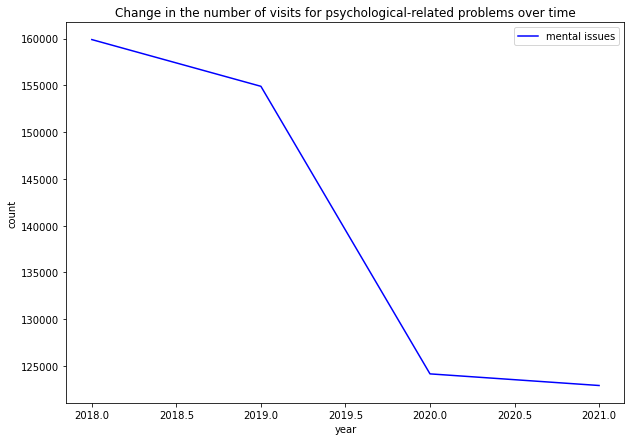

In [82]:
fig = plt.figure(figsize=(10,7))
plt.plot(df_mental_year.index, df_mental_year['Operating Certificate Number'], label="mental issues", c = 'b')
# plt.plot(df_year.index, df_year['Operating Certificate Number'], label="all")
plt.xlabel("year")
plt.ylabel("count")
plt.title("Change in the number of visits for psychological-related problems over time")
plt.legend()
plt.show()

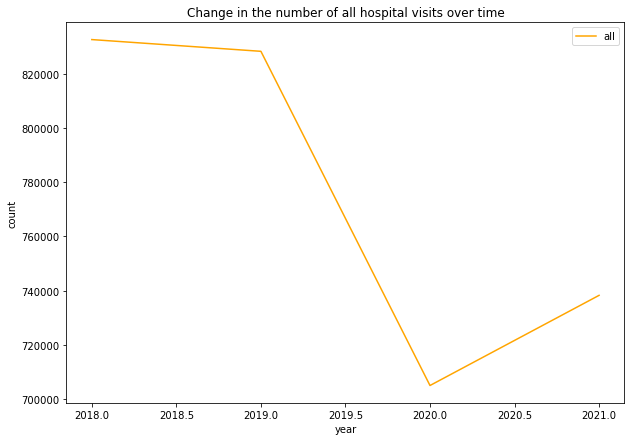

In [83]:
fig = plt.figure(figsize=(10,7))
#plt.plot(df_mental_year.index, df_mental_year['Operating Certificate Number'], label="mental issues")
plt.plot(df_year.index, df_year['Operating Certificate Number'], label="all", c = 'orange')
plt.xlabel("year")
plt.ylabel("count")
plt.title("Change in the number of all hospital visits over time")
plt.legend()
plt.show()

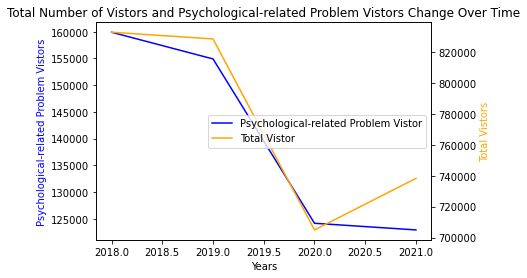

In [84]:
#fig = plt.figure(figsize=(10,7))
X = df_year.index
y1 = df_mental_year['Operating Certificate Number']
y2 = df_year['Operating Certificate Number']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
l1, = ax1.plot(X, y1, 'b-',label = 'Psychological-related Problem Vistor')
l2, = ax2.plot(X, y2, '-', color = 'orange', label = 'Total Vistor')
plt.title('Total Number of Vistors and Psychological-related Problem Vistors Change Over Time')

ax1.set_xlabel('Years')
ax1.set_ylabel('Psychological-related Problem Vistors', color='b')
ax2.set_ylabel('Total Vistors', color = 'orange')
plt.legend([l1,l2],['Psychological-related Problem Vistor','Total Vistor'])
plt.show()

In [19]:
# df[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count().plot.bar()